# Housing prises

In this project we are trying to predict the price of a house using mashine learning. The data we use is based on (...). The dataset seems resnenable, and can be used.

## Get the data
The data is the one from the kaggle. We have downloaded it.

In [1]:
import pandas as pd
import numpy as np

In [2]:
housingprice = pd.read_csv("data/train.csv")
housingprice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Explore the data

In [3]:
r = open("data/data_description.txt")
print(r.read())
r.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

We note from reading the description, that a lot of the contitions are classes.

In [4]:
housingprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We start of by studeing the once that have null values

In [5]:
hasNa = housingprice.columns[housingprice.isna().any()]
housingprice[hasNa].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


Of the once with na, only three are a number. 
- For LotFrontage, the reason may be that the propery isn't conected to a street. 
- We note that for most properties, the MasVnrAre is 0.
- The last one is only relevent, if there is a garage.

We can handle these later

In [6]:
hasNa.drop(["LotFrontage", "MasVnrArea", "GarageYrBlt"])

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

- Alley - NA means that there isn't an alley
- MasVnrType - There are only a couple that dosn't have this value, likely to be none
- BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinType2 - NA means no basement
- Electrical - One NA
- FireplaceQu - NA means no fireplace
- GarageType, GarageFinish, GarageQual, GarageCond - NA means no garage
- PoolQC - Only 7 houses with a pool
- Fence - NA means no fence
- MiscFeature - NA means no "spesical" feature.

We note that for some of these, creating a column for wether or not a feature excists, can be relevant. 

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

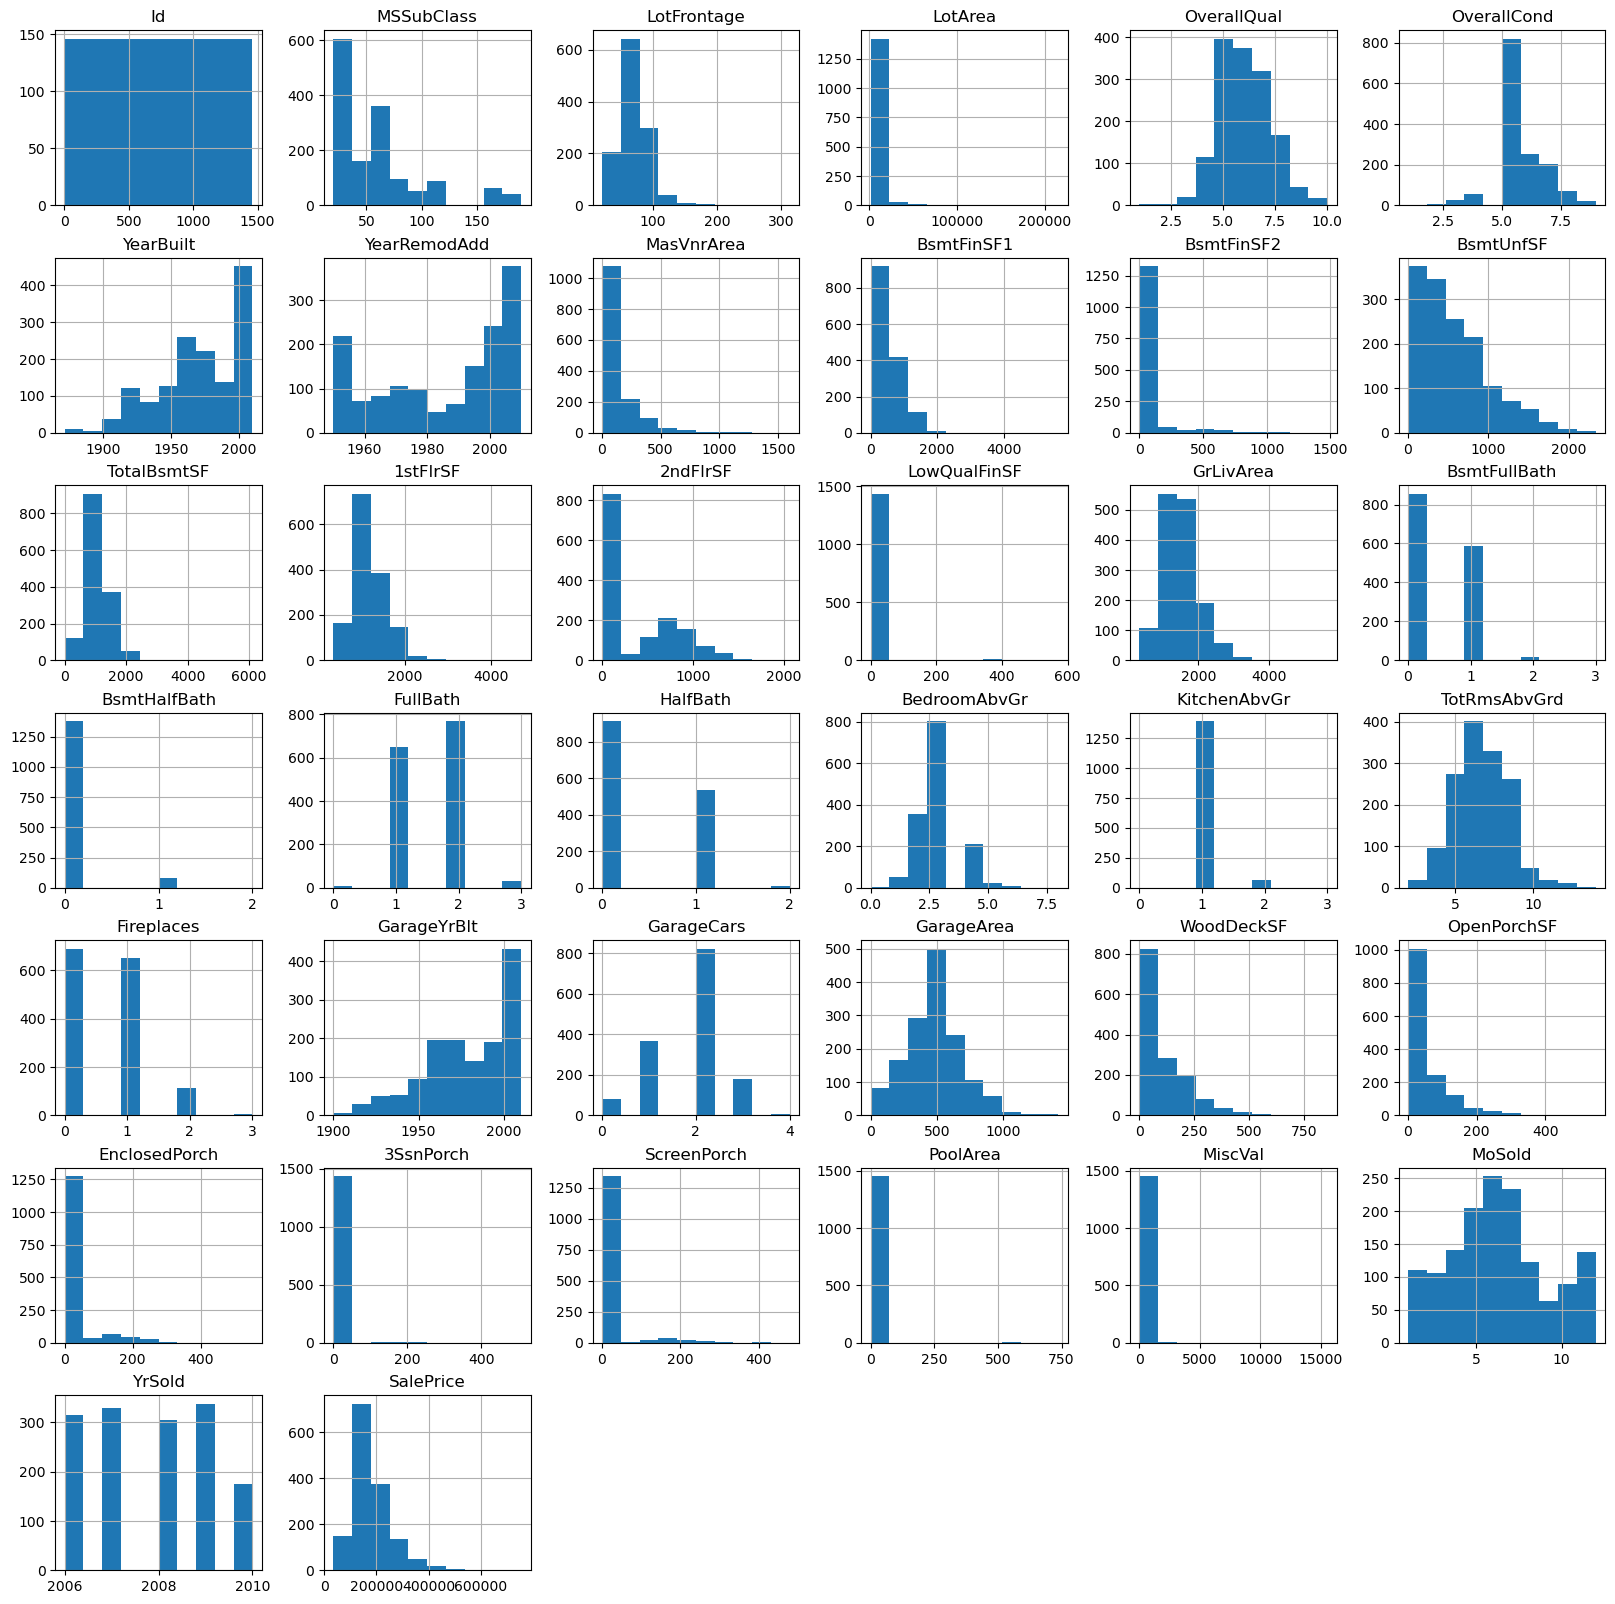

In [7]:
housingprice.hist(figsize=(20,20), bins=10)

We start of by removing taking note of the once with few posible values.
- BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, KitchenAbvGr, Fireplaces and GaragCars
These are all resenable

We look those with large peaks around 0
- LotArea, MasVnrArea, BsmtFinSF2, 2ndFlrSF, LowQualFinSF, EnclosedPorch, 3SsnProch, SreenPorch, PoolArea, MiscVal

In [8]:
peak0 = ["LotArea", "BsmtFinSF2", "2ndFlrSF", "LowQualFinSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]
housingprice[peak0].describe()

,LotArea,BsmtFinSF2,2ndFlrSF,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,46.549315,346.992466,5.844521,21.954110,3.409589,15.060959,2.758904,43.489041
std,9981.264932,161.319273,436.528436,48.623081,61.119149,29.317331,55.757415,40.177307,496.123024
min,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7553.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9478.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11601.500000,0.000000,728.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,215245.000000,1474.000000,2065.000000,572.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [9]:
for p in peak0:
    print(p, str(len(housingprice[housingprice[p]>0])/len(housingprice[p])*100))

LotArea 100.0
BsmtFinSF2 11.438356164383562
2ndFlrSF 43.219178082191775
LowQualFinSF 1.7808219178082192
EnclosedPorch 14.246575342465754
3SsnPorch 1.643835616438356
ScreenPorch 7.9452054794520555
PoolArea 0.4794520547945206
MiscVal 3.5616438356164384


In [10]:
non0 = ["BsmtFinSF2", "LowQualFinSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]

We note that for some of these values that have a small amout of non 0, it might be more interesing that the value is not 0 then the value it self. 

We will now start testing changes to the dataset

In [11]:
data = housingprice.copy()

In [12]:
#for o in non0:
#    data["non0_"+o] = data[o] > 0

In [13]:
hasNa

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [14]:
for n in ['Alley', 'BsmtQual', 'FireplaceQu', 'GarageType', 'PoolQC', 'Fence', 'MiscFeature']:
    data["na_"+n] = data[n].isna()

In [15]:
# If not already done
# pip install pandas-profiling
from pandas_profiling import ProfileReport

From looking at the profile report below, it was posible to conclude that some of the columns didn't give much value because they are mostly the same value:

In [16]:
usless = ["Street", "Utilities", "RoofMatl", "PoolQC", "Id"]
data = data.drop(columns=usless)

Some might be able to combine:
- Condition1 and Condition2
- Poolstuff and MiscFeature

Some that are objects, should be changed to int (they are scales)

In [17]:
toInt = ["LotShape", "ExterQual", "ExterCond", "BsmtCond", "BsmtExposure",
         "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical", "Functional", 
        "FireplaceQu", "GarageQual", "GarageCond"]

# One even had numbers in the object descritions
spesial = ["BsmtQual"]

In [18]:
r = open("data/data_description.txt")
c = 0
while c<=2:
    t = r.readline().split(":")[0]
    if len(t.strip()) > 1:
        c=0
    if t in toInt:
        c=0
        r.readline()
        changer = {np.nan: np.nan}
        counter = 0.0
        while True:
            n = r.readline()
            sp = n.strip().split("\t")
            if len(sp) <= 1:
                break
            changer[sp[0]] = counter
            counter += 1
        data[t] = data[t].apply(lambda a : changer[a])
    if t.strip() == "":
        c+=1
r.close()

In [19]:
changer = {"Ex": 100, "Gd": 90, "TA": 80, "Fa": 60, "PO": 50, np.nan: np.nan}
data["BsmtQual"] = data["BsmtQual"].apply(lambda a : changer[a])

In [20]:
r = open("data/data_description.txt")
r.readline()
r.readline()
changer = {}
while True:
    n = r.readline().strip().split()
    if len(n) <= 1:
        break
    changer[int(n[0])] = " ".join(n[1:-1])
data["MSSubClass"] = data["MSSubClass"].apply(lambda a : changer[a])

In [21]:
abs(data.corr()["SalePrice"]).sort_values()

BsmtFinSF2        0.011378
BsmtHalfBath      0.016844
ExterCond         0.018899
MiscVal           0.021190
LowQualFinSF      0.025606
YrSold            0.028923
BsmtFinType2      0.040139
3SsnPorch         0.044584
MoSold            0.046432
na_MiscFeature    0.072298
OverallCond       0.077856
PoolArea          0.092404
na_PoolQC         0.093708
Functional        0.107619
ScreenPorch       0.111447
na_Alley          0.123611
GarageCond        0.125013
EnclosedPorch     0.128578
KitchenAbvGr      0.135907
na_BsmtQual       0.152829
GarageQual        0.156693
BsmtCond          0.160658
BedroomAbvGr      0.168213
na_Fence          0.172184
BsmtUnfSF         0.214479
BsmtFullBath      0.227122
Electrical        0.233590
na_GarageType     0.236832
LotArea           0.263843
LotShape          0.267759
BsmtFinType1      0.277436
HalfBath          0.284108
FireplaceQu       0.295794
OpenPorchSF       0.315856
2ndFlrSF          0.319334
WoodDeckSF        0.324413
LotFrontage       0.351799
B

In [22]:
data.shape

(1460, 83)

In [23]:
hasNa = data.columns[data.isna().any()]
data[hasNa].describe()

,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageYrBlt,GarageQual,GarageCond
count,1201.000000,1452.000000,1423.000000,1423.000000,1422.000000,1423.000000,1422.000000,1459.000000,770.000000,1379.000000,1379.000000,1379.000000
mean,70.049958,103.685262,85.551651,1.988756,2.326301,2.361911,4.719409,0.110350,1.538961,1978.506164,2.024656,2.026106
std,24.284752,181.066207,7.516599,0.287846,1.047297,2.054910,0.880249,0.394782,0.743705,24.689725,0.248598,0.239527
min,21.000000,0.000000,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000
25%,59.000000,0.000000,80.000000,2.000000,2.000000,0.000000,5.000000,0.000000,1.000000,1961.000000,2.000000,2.000000
50%,69.000000,0.000000,90.000000,2.000000,3.000000,2.000000,5.000000,0.000000,1.000000,1980.000000,2.000000,2.000000
75%,80.000000,166.000000,90.000000,2.000000,3.000000,5.000000,5.000000,0.000000,2.000000,2002.000000,2.000000,2.000000
max,313.000000,1600.000000,100.000000,4.000000,3.000000,5.000000,5.000000,4.000000,4.000000,2010.000000,4.000000,4.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1460 non-null   object 
 1   MSZoning        1460 non-null   object 
 2   LotFrontage     1201 non-null   float64
 3   LotArea         1460 non-null   int64  
 4   Alley           91 non-null     object 
 5   LotShape        1460 non-null   float64
 6   LandContour     1460 non-null   object 
 7   LotConfig       1460 non-null   object 
 8   LandSlope       1460 non-null   object 
 9   Neighborhood    1460 non-null   object 
 10  Condition1      1460 non-null   object 
 11  Condition2      1460 non-null   object 
 12  BldgType        1460 non-null   object 
 13  HouseStyle      1460 non-null   object 
 14  OverallQual     1460 non-null   int64  
 15  OverallCond     1460 non-null   int64  
 16  YearBuilt       1460 non-null   int64  
 17  YearRemodAdd    1460 non-null   i

In [25]:
c = list(data.select_dtypes(include="object").columns)
c

['MSSubClass',
 'MSZoning',
 'Alley',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
c.append("SalePrice")

In [27]:
#ProfileReport(data[c])

## Creating a pipe

First we will nead to make a class that can do this jobb for us

In [28]:
toInt = ["LotShape", "ExterQual", "ExterCond", "BsmtCond", "BsmtExposure",
         "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical", "Functional", 
        "FireplaceQu", "GarageQual", "GarageCond", "KitchenQual"]

class AttributConverter:
    def __init__(self):
        return
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X, y=None):
        data = X.copy()
        
        # Convertes based on the posision in the documnetation
        r = open("data/data_description.txt")
        c = 0
        while c<=2:
            t = r.readline().split(":")[0]
            if len(t.strip()) > 1:
                c=0
            if t in toInt:
                c=0
                r.readline()
                changer = {np.nan: np.nan}
                counter = 0.0
                while True:
                    n = r.readline()
                    sp = n.strip().split("\t")
                    if len(sp) <= 1:
                        break
                    changer[sp[0]] = counter
                    counter += 1
                data[t] = data[t].apply(lambda a : changer[a])
            if t.strip() == "":
                c+=1
        r.close()
        
        changer = {"Ex": 100, "Gd": 90, "TA": 80, "Fa": 60, "PO": 50, np.nan: np.nan}
        data["BsmtQual"] = data["BsmtQual"].apply(lambda a : changer[a])
        
        # Goes from int to class
        r = open("data/data_description.txt")
        r.readline()
        r.readline()
        changer = {}
        while True:
            n = r.readline().strip().split()
            if len(n) <= 1:
                break
            changer[int(n[0])] = " ".join(n[1:-1])
        data["MSSubClass"] = data["MSSubClass"].apply(lambda a : changer[a])
        
        data = data.drop(columns=["MSSubClass", "Street", "Utilities", "RoofMatl", "PoolQC", "Id"])
        
        self.feature_names = data.columns
        
        return data
    
    def get_feature_names(self):
        return self.feature_names
        
        

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer

num_pipe = Pipeline([
    ('attribut_converter', AttributConverter()),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

objectColumns = ['MSZoning', 'Alley', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'CentralAir', 'GarageType',
       'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']

full_convert_pipe = ColumnTransformer([
    ("text", OneHotEncoder(), objectColumns)],
    remainder=num_pipe
)

In [31]:
d = full_convert_pipe.fit_transform(housingprice)

In [32]:
full_convert_pipe.named_transformers_

{'text': OneHotEncoder(),
 'remainder': Pipeline(steps=[('attribut_converter',
                  <__main__.AttributConverter object at 0x000001F78C0FDFF0>),
                 ('imputer', SimpleImputer(strategy='median')),
                 ('std_scaler', StandardScaler())])}

In [33]:
f = list(full_convert_pipe.named_transformers_["text"].get_feature_names_out())
f.extend(list(full_convert_pipe.named_transformers_["remainder"]["imputer"].get_feature_names_out()))

In [34]:
n = pd.DataFrame(d, columns=f)
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 221 entries, MSZoning_C (all) to SalePrice
dtypes: float64(221)
memory usage: 2.5 MB


In [35]:
corrn = abs(n.corr()["SalePrice"]).sort_values()
for i in corrn.index:
    print(str(i) + "\t" + str(corrn[i]))

RoofStyle_Mansard	0.00030831909381730856
FireplaceQu	0.0004519688645097125
Foundation_Wood	0.002711477582914989
Condition2_RRAe	0.002992932092785038
BldgType_TwnhsE	0.0038043834533088884
LotConfig_Corner	0.004144823294072472
Condition1_RRNe	0.0045838751352684564
MiscFeature_Gar2	0.004743556939191941
Fence_GdPrv	0.005151941767351644
Condition1_RRAn	0.005892711711544369
LotConfig_FR2	0.006858890782775978
BsmtFinSF2	0.011378121450215155
Foundation_Stone	0.012102630775853218
SaleType_ConLI	0.014371054765972375
Condition2_RRAn	0.014510444733969168
Neighborhood_SawyerW	0.01456015331848872
SaleCondition_Alloca	0.01552537401541985
RoofStyle_Flat	0.016433478287942244
Exterior2nd_Stone	0.01675352766894576
BsmtHalfBath	0.016844154297359
Exterior1st_Plywood	0.01771925649284013
LotConfig_FR3	0.018185562475503344
ExterCond	0.01889911848241301
Neighborhood_Blmngtn	0.019065649513505426
SaleType_CWD	0.019588066467574435
Heating_GasW	0.02010259903543335
Neighborhood_Blueste	0.020250412762982367
RoofStyl

In [48]:
n = n[["YearBuilt", "YearRemodAdd", "OverallQual", "ExterQual", "KitchenQual",
          "GarageCars", "GrLivArea", "FullBath", "Fireplaces", "1stFlrSF", "SalePrice"]]

In [49]:
n.shape

(1460, 11)

In [50]:
X = n.drop(columns="SalePrice")
y = n["SalePrice"]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [53]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear_score = cross_val_score(linear, X_train, y_train, scoring='neg_median_absolute_error', cv=5)
print(linear_score.mean())

-0.22921597588058745


In [54]:
linear = LinearRegression()
linear_score = cross_val_score(linear, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print(linear_score.mean())

-0.3055514978350149


In [55]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor(n_estimators=50, random_state=42)
ran_for_score = cross_val_score(ran_for, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print(ran_for_score.mean())
print(ran_for_score)

-0.2633587594127057
[-0.27075789 -0.34294697 -0.25437485 -0.23812708 -0.21058701]


In [56]:
rand = ran_for.fit(X_train, y_train)

In [57]:
from joblib import dump
filename = 'finalized_model.joblib'
dump(rand, filename)

['finalized_model.joblib']